# Basics of Bond Pricing

This document illustrates some basic concepts of bond analytics such as pricing, duration, convexity and simple trading strategies.

In [7]:
import numpy as np
import bondfns

__Bond Price__ is inversely propotional to it's yield.

Consider two bonds: BondA and BondB, both with 6% coupon.
BondA matures in 5 years while BondB in 10 years

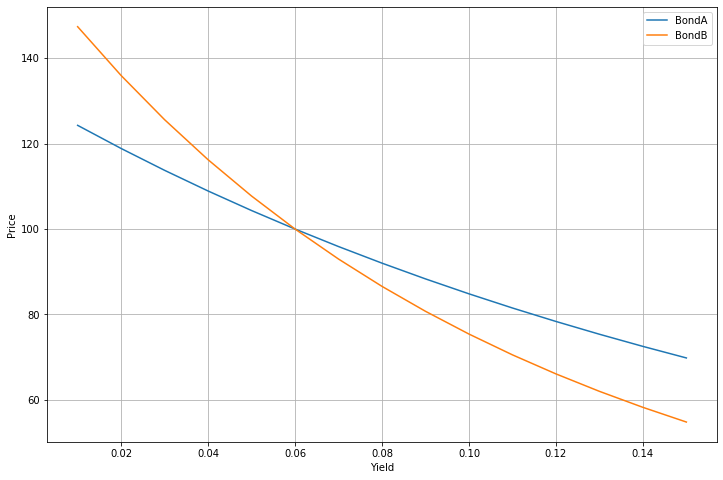

In [8]:
cpn_a, cpn_b = 0.06, 0.06
ttm_a, ttm_b = 5,10
ytm = np.arange(1,16)*0.01

price_a = bondfns.price(ytm,ttm_a,1,cpn_a)
price_b = bondfns.price(ytm,ttm_b,1,cpn_b)

bondfns.plot(series=[(ytm, price_a, 'BondA'),(ytm, price_b,'BondB')], xlabel= 'Yield', ylabel='Price')

Note that both bonds have same price = 100, i.e. at *par* when Yield = couppon rate = 0.06.

In general, Bond sells at: 
* __Discount__ for yield > coupon 
* __Par__ for yield = coupon
* __Premium__ for yield < coupon

__Duration__ is sensitivity of bond price from change in interest rate. For the ease of calculation, I have calculated *modified duration*, which is defined as,


$Modified Duration$ $=$ $\frac{-1}{P} \times\ \frac{\partial P}{\partial Y}$ 	

where, P = Price,
       Y = Yield to Maturity

Bond with smaller coupon rate has higher duration vs bond with larger coupon rate. This is shown below using 3 bonds with coupon = 0, 0.05 and .12.

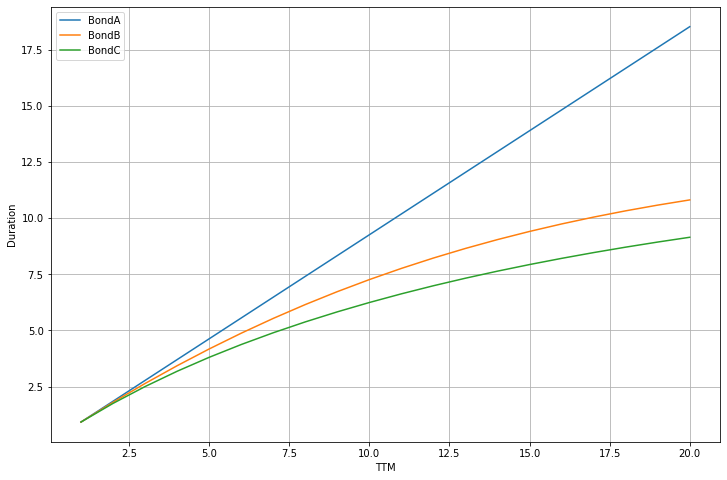

In [9]:
ytm = 0.08
cpn_a, cpn_b, cpn_c = 0., 0.05, 0.12
ttms = np.arange(1,21)
durations = list()
for cpn in (cpn_a, cpn_b, cpn_c):
    durations.append([bondfns.mod_yield_duration(ytm,ttm,1,cpn) for ttm in ttms])

bondfns.plot(series=[(list(ttms), durations[0], 'BondA'),(list(ttms), durations[1], 'BondB'), 
                  (list(ttms), durations[2], 'BondC')],xlabel= 'TTM', ylabel='Duration')

__Duration Hedging__

Suppose a pension fund has a liability of $20 mil that matures in 7 years. The fund wants to hedge it in the market. There are 2 zero-coupon bonds to buy. One bond has a maturity of 3 years and the other 20 year. Assuming that yield is flat 4\%, what should be the position in the bonds for a delta neutral portfolio ? How this position will perform for a large change in the yield?

  $ W_{3Y} + W_{20Y} = 1 $
  
  $ W_{3Y} \times\ D_{3Y} + W_{10Y} \times\ D_{20Y} = D_{Liability} $
  
  where, 
  * $ W_{3Y} $ = weight of 3Y ZC bond
  * $ W_{20Y}$ = weight of 20Y ZC bond
  * $ D_{3Y}$ = Duration of 3Y ZC bond
  * $ D_{20Y}$ = Duration of 20Y ZC bond
  * $ D_{Liability} $ = Duratuion of liability 7Y
  
Solving this we get : $ W_{3Y} $ = 0.76 and $ W_{20Y} $ = 0.24

The hedge will be effective only for a small change in yield. Because of *convexity*, the combined position will make money for large up/down move in yield. The performance profile of the combined position is shown below:

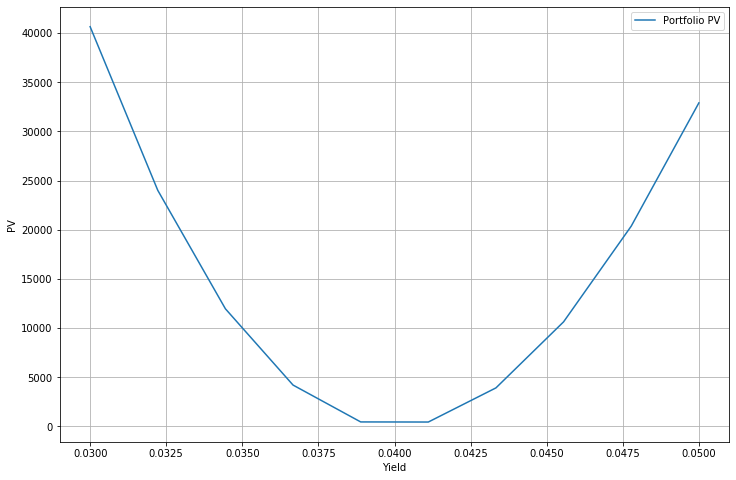

In [10]:
yields = np.linspace(0.03,0.05, num=10)
lblity_pv = bondfns.price(0.04,7,0,0,fv=20e6)
lblity_dur = bondfns.mod_yield_duration(0.04,7,0,0,fv=20e6)
zc3_pv, zc20_pv = bondfns.price(0.04,3,0,0,fv=100), bondfns.price(0.04,20,0,0,fv=100)
zc3_dur, zc20_dur = bondfns.mod_yield_duration(0.04,3,0,0,fv=100), bondfns.mod_yield_duration(0.04,20,0,0,fv=100)
wt_zc3 = (lblity_dur-zc20_dur)/(zc3_dur - zc20_dur)
wt_zc20 = 1-wt_zc3
qty_zc3 = wt_zc3*lblity_pv/zc3_pv
qty_zc20 = wt_zc20*lblity_pv/zc20_pv
lblity_pvs = [bondfns.price(ytm,7,0,0,fv=-20e6) for ytm in yields]
zc3_pvs = [bondfns.price(ytm,3,0,0,fv=qty_zc3*100) for ytm in yields]
zc20_pvs = [bondfns.price(ytm,20,0,0,fv=qty_zc20*100) for ytm in yields]
ptflo_pv = [sum(comb_pv) for comb_pv in zip(lblity_pvs,zc3_pvs,zc20_pvs)] 

bondfns.plot(series=[(list(yields), ptflo_pv, 'Portfolio PV')],xlabel= 'Yield', ylabel='PV')



In [11]:
lblity_cvx = bondfns.convexity(0.04,7,0,0,fv=-20e6)
zc3_cvx = bondfns.convexity(0.04,3,0,0,fv=qty_zc3*100)
zc20_cvx = bondfns.convexity(0.04,20,0,0,fv=qty_zc20*100)
print('Portfolio convexity : %7.3f' %sum((lblity_cvx,zc3_cvx,zc20_cvx)))

Portfolio convexity : 73069.127
